<a href="https://colab.research.google.com/github/marisbotero/ML/blob/master/Sesion1_Preprocesamiento_de_los_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del caso**

Predecir o estimar el precio de una vivienda puede ser de gran ayuda a la hora  de tomar decisiones importantes tales como la adquisición de casa propia . A continuación se presenta un dataset compuesto por **25, 660 registros** para **Argentina y Colombia** adjunto a las siguientes **10 variables**:

    1.   pais : "Argentina", "Colombia"
    2.   provincia_departamento: Provincia o departamento (no ambas)  donde se ubica el departamento
    3.   ciudad: Ciudad donde se ubica el departamento
    4.   property_type: "Departamento", "Apartamento"
    5.   operation_type: "Venta", "Alquiler"
    6.   rooms: cantidad de espacios en general dentro del apartamento
    7.   bedrooms: cantidad de cuartos donde dormir dentro del apartamento
    8.   bathrooms: cantidad de baños dentro del apartamento
    9.   surface_total: área total en metros cuadrados del departamento
    10.  currency: USD (dólar americano)

![Image of Yaktocat](https://www.datasource.ai/uploads/7c2c64c37b855715637538ef4f19a46d.png)

# **Lectura de los datos**

In [1]:
import pandas as pd
import numpy as np
tipo_datos={'rooms': 'int', 'bedrooms': 'int', 'bathrooms': 'int', 'surface_total': 'int', 'price': 'int'}
data=pd.read_csv("https://raw.githubusercontent.com/javalpe/datasets/master/234f7576969252b72e52fa4a4027fabd.csv", encoding='latin', index_col='Id', dtype=tipo_datos)

In [5]:
data.drop('currency', axis=1, inplace=True)

In [4]:
data.drop('operation_type', axis=1, inplace=True)

# **Preprocesamiento de los datos**

## I. *Verificación de datos perdidos*

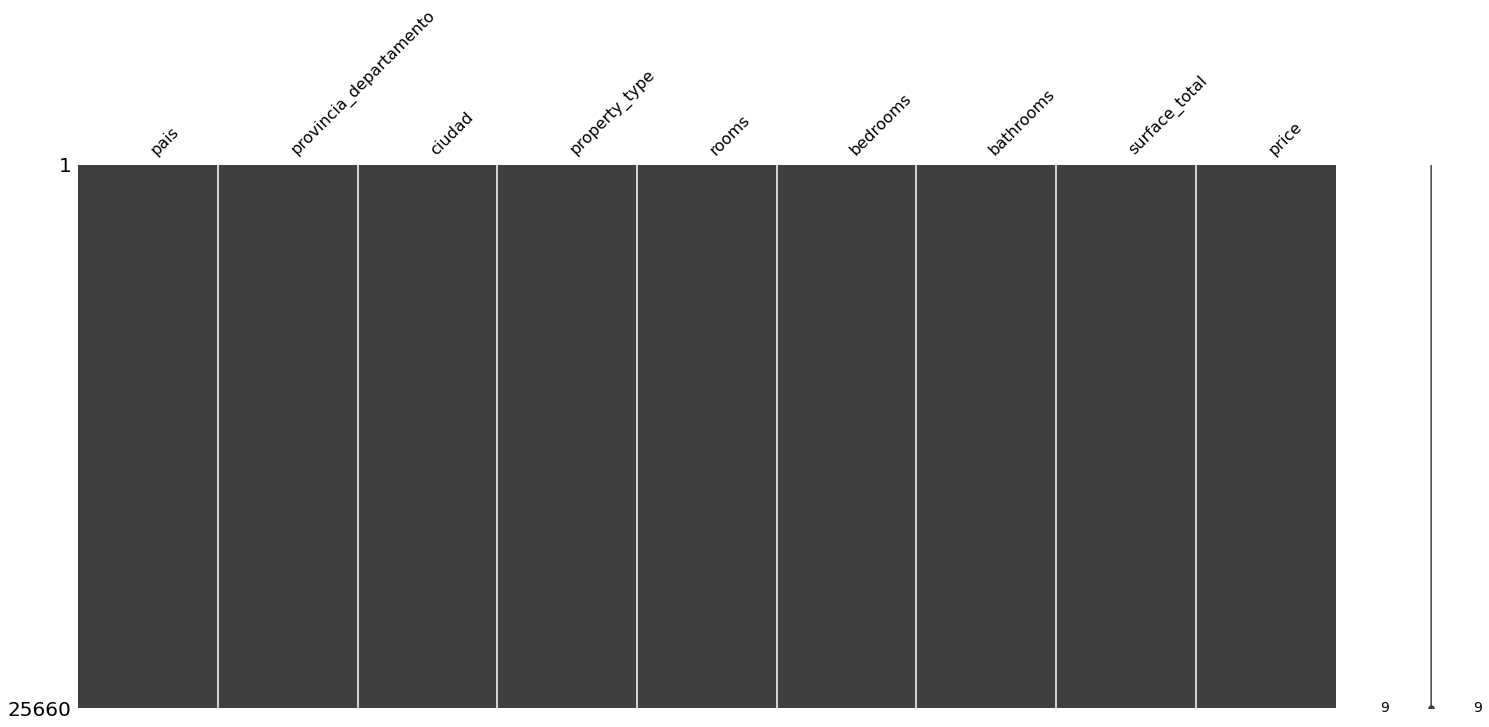

In [7]:
#Es una libreria para indentificar cuando las variables tengan espacios vacios 
import missingno as ms
ms.matrix(data)

In [8]:
for col in data.columns:
  print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

En la columna pais hay 0 valores nulos
En la columna provincia_departamento hay 0 valores nulos
En la columna ciudad hay 0 valores nulos
En la columna property_type hay 0 valores nulos
En la columna rooms hay 0 valores nulos
En la columna bedrooms hay 0 valores nulos
En la columna bathrooms hay 0 valores nulos
En la columna surface_total hay 0 valores nulos
En la columna price hay 0 valores nulos


## II. *Verificación de outliers*

Para el presente caso, la variable más susceptible a error de valores muy por encima del promedio es la **columna precio**

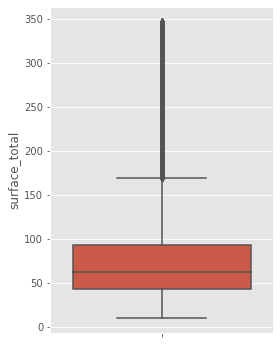

In [9]:
"Se recomienda el uso del método boxplot de la librería seaborn (sns) para una rápida verificación de los outliers"
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(4,6))
sns.boxplot(data['surface_total'], orient='v')
plt.show()

Como se ha hecho evidente existen outliers en la columna precio, así que proceda a **reemplazarlos por el percentil 95**

In [10]:
outliers = data[data['surface_total'] > data['surface_total'].quantile(.95)].index
data.loc[outliers,'surface_total'] = data['surface_total'].quantile(.95)

## III. *Feature Engineering*

Sería interesante calcular para **todos los registros** el área por cada baño, cuarto y habitación. Para ello tome las siguientes aproximaciones:

      1. Área de un baño = 12,5% del área total
      2. Área de un cuarto = 15% del área total
      3. Área de una habitación = 20% del área total   



**Crear la función** necesaria para calcular las áreas por cada registro y **añadir** los resultados como **nuevas columnas** de data

In [11]:
def area_bathroom (a, b): 
    return (0.125*b)/a

In [16]:
def area_bedrooms (a, b): 
    return (0.15*b)/a

In [18]:
def area_rooms (a, b): 
    return (0.20*b)/a

In [13]:
data['area_bathroom'] = data.apply(lambda row : area_bathroom(row['bathrooms'],row['surface_total']), axis = 1)
data.head()

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price,area_bathroom
Id,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,2,1,1,37.0,85000,4.625000
1,Argentina,Capital Federal,Palermo,Departamento,6,4,4,194.0,1590000,6.062500
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,3,3,3,95.0,85329,3.958333
3,Colombia,Valle del Cauca,Cali,Apartamento,3,3,1,60.0,22846,7.500000
4,Argentina,Capital Federal,Balvanera,Departamento,3,2,1,45.0,80000,5.625000


In [17]:
data['area_bedrooms'] = data.apply(lambda row : area_bedrooms(row['bedrooms'],row['surface_total']), axis = 1)
data.head()

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price,area_bathroom,area_bedrooms,area_rooms
Id,,,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,2,1,1,37.0,85000,4.625000,5.550,2.312500
1,Argentina,Capital Federal,Palermo,Departamento,6,4,4,194.0,1590000,6.062500,7.275,4.041667
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,3,3,3,95.0,85329,3.958333,4.750,3.958333
3,Colombia,Valle del Cauca,Cali,Apartamento,3,3,1,60.0,22846,7.500000,3.000,2.500000
4,Argentina,Capital Federal,Balvanera,Departamento,3,2,1,45.0,80000,5.625000,3.375,1.875000


In [19]:
data['area_rooms'] = data.apply(lambda row : area_rooms(row['rooms'],row['surface_total']), axis = 1)
data.head()

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price,area_bathroom,area_bedrooms,area_rooms
Id,,,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,2,1,1,37.0,85000,4.625000,5.550,3.700000
1,Argentina,Capital Federal,Palermo,Departamento,6,4,4,194.0,1590000,6.062500,7.275,6.466667
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,3,3,3,95.0,85329,3.958333,4.750,6.333333
3,Colombia,Valle del Cauca,Cali,Apartamento,3,3,1,60.0,22846,7.500000,3.000,4.000000
4,Argentina,Capital Federal,Balvanera,Departamento,3,2,1,45.0,80000,5.625000,3.375,3.000000


## IV. *Merge con data externa*

Se ha procedido a comparar el **precio promedio** de cada **departamento_provincia** dando como resultado un indicador **entero**:

In [23]:
externa=pd.read_csv("https://raw.githubusercontent.com/javalpe/datasets/master/merge.csv",sep=";")

Actualizamos data incluyendo una **nueva columna** al final

In [28]:
data=data.merge(externa, left_on='provincia_departamento', right_on='provincia_departamento')

In [29]:
data.head()

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price,area_bathroom,area_bedrooms,area_rooms,indicador_x,indicador_y,indicador
0,Argentina,Capital Federal,Villa Crespo,Departamento,2,1,1,37.0,85000,4.6250,5.550,3.700000,15,15,15
1,Argentina,Capital Federal,Palermo,Departamento,6,4,4,194.0,1590000,6.0625,7.275,6.466667,15,15,15
2,Argentina,Capital Federal,Balvanera,Departamento,3,2,1,45.0,80000,5.6250,3.375,3.000000,15,15,15
3,Argentina,Capital Federal,Villa Crespo,Departamento,4,3,1,100.0,174500,12.5000,5.000,5.000000,15,15,15
4,Argentina,Capital Federal,Almagro,Departamento,2,1,1,56.0,138000,7.0000,8.400,5.600000,15,15,15


In [25]:
externa

,provincia_departamento,indicador
0,Capital Federal,15
1,Bs.As. G.B.A. Zona Norte,11
2,Neuquén,9
3,Chubut,9
4,Misiones,8
5,Río Negro,8
6,Santa Fe,7
7,Bs.As. G.B.A. Zona Sur,7
8,Jujuy,7
9,Buenos Aires Interior,6
